<a href="https://colab.research.google.com/github/Yonasafom/D4_Bootcamp/blob/main/Final_Project__Yonas_Sium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Original Data
#https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
#https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [3]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')

# the following is necessary on some computers:
df = df.rename(columns={"0": "review", "1": "sentiment"})

In [4]:
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


In [5]:
df.shape

(50000, 2)

In [6]:
df.iloc[0,0]

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

#Plotting the data

In [7]:
# Sample for plotting
df2 = df.iloc[:50,:]

In [ ]:
df2.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


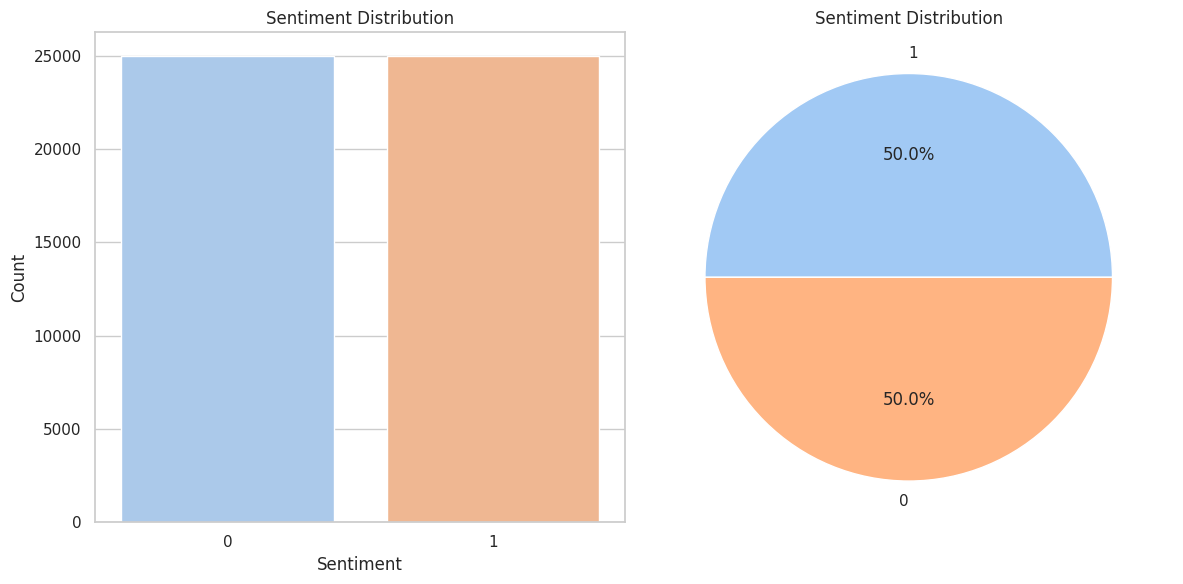

In [8]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create a subplot with two plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Distribution of Sentiment
sns.countplot(x="sentiment", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Sentiment Distribution")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")

# Plot 2: Pie Chart of Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[1].set_title("Sentiment Distribution")
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#Cleaning the text(eg, removing emoticons) and processing the text into tokens, word stemming and removing the stop words

In [9]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')
porter = PorterStemmer()

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))

    tokens = [porter.stem(w) for w in text.split() if w not in stop]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
#before removal
df.loc[0, 'review']

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

In [11]:
df['review'] = df['review'].apply(preprocessor)

In [ ]:
#After removal of the emoticons
df.loc[0, 'review']

#Vectorization(Changing catagorical data to numerical)

In [13]:
#vectoriztion

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

def tfidf_vec(data):

     # Convert the string lists into space-separated strings
    df['review'] = df['review'].apply(lambda x: ' '.join(x))

    # Initialize the TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the text data using TfidfVectorizer
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

    # Convert the TF-IDF matrix to a numpy array
    tfidf_array = tfidf_matrix.toarray()

    return tfidf_array

In [16]:
X = tfidf_vec(df)

In [15]:
y = pd.DataFrame(df, columns = ["sentiment"]).values

#Splitting the bag of words into train and test set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [18]:
X_train.shape

(35000, 73639)

In [19]:
X_test.shape

(15000, 73639)

#Training a logistic regression and Naive bayes models for sentiment classfication from sklearn

In [20]:
#Model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [21]:
lr_tfidf = LogisticRegression()

In [22]:
lr_tfidf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
y_lr_pred = lr_tfidf.score(X_test, y_test)

In [24]:
print(f'LogesticRegression Test Accuracy: {y_lr_pred:.3f}')

LogesticRegression Test Accuracy: 0.891


In [25]:
#Naive Bayes
# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [28]:
# Make predictions on the test set
y_nb_pred = clf.score(X_test, y_test)

In [29]:
print(f'Naive Bayes Test Accuracy: {y_nb_pred:.3f}')

Naive Bayes Test Accuracy: 0.864


#Training a RNN  for sentiment analysis of movie reviews

In [3]:
import torch
import torch.nn as nn

Importing IMDB dataset from torchtext

In [4]:
!pip install torchtext

In [5]:
!pip install portalocker

Preprocessing the dataset

In [6]:
#lodad IMDB dataset and split the trainset into train and validation set
from torch.utils.data.dataset import random_split
from torchtext.datasets import IMDB

train_data = IMDB(split='train')
test_data = IMDB(split='test')

test_data = list(test_data)


torch.manual_seed(1)
train_set, val_set = random_split(
    list(train_data), [20000, 5000])

In [7]:
#sample review
train_set[0]

(2,
 'An extra is called upon to play a general in a movie about the Russian Revolution. However, he is not any ordinary extra. He is Serguis Alexander, former commanding general of the Russia armies who is now being forced to relive the same scene, which he suffered professional and personal tragedy in, to satisfy the director who was once a revolutionist in Russia and was humiliated by Alexander. It can now be the time for this broken man to finally "win" his penultimate battle. This is one powerful movie with meticulous direction by Von Sternberg, providing the greatest irony in Alexander\'s character in every way he can. Jannings deserved his Oscar for the role with a very moving performance playing the general at his peak and at his deepest valley. Powell lends a sinister support as the revenge minded director and Brent is perfect in her role with her face and movements showing so much expression as Jannings\' love. All around brilliance. Rating, 10.')

Transform the catagorical value in to numeric value to prepare it to an nn as input

In [8]:
import re
from collections import Counter, OrderedDict

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    tokenized = text.split()
    return tokenized

In [9]:
token_counts = Counter()

for label, line in train_set:
    tokens = tokenizer(line)
    token_counts.update(tokens)

In [10]:
print('Vocab-size:', len(token_counts))

Vocab-size: 69023


In [11]:
from torchtext.vocab import vocab

sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
ordered_dict = OrderedDict(sorted_by_freq_tuples)

vocab = vocab(ordered_dict)

vocab.insert_token("<pad>", 0)
vocab.insert_token("<unk>", 1)
vocab.set_default_index(1)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
from torchtext import __version__ as torchtext_version
from pkg_resources import parse_version

text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
label_pipeline = lambda x: 1. if x == 2 else 0.

In [ ]:
print(device)

cuda


In [14]:
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _label, _text in batch:

        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text),
                                      dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True)

    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

In [15]:
#batching the datasets
from torch.utils.data import DataLoader

batch_size = 32

train_dl = DataLoader(train_set, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(val_set, batch_size=batch_size,
                      shuffle=False, collate_fn=collate_batch)
test_dl = DataLoader(test_data, batch_size=batch_size,
                     shuffle=False, collate_fn=collate_batch)

In [16]:
text_batch, label_batch, length_batch = next(iter(train_dl))

# print(text_batch)
# print(label_batch)
# print(length_batch)
# print(text_batch.shape)

### Building an RNN model

* **RNN layers:**
  * `nn.RNN(input_size, hidden_size, num_layers=1)

In [17]:
#Fully connected neural network with one hidden layer

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, vocab_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size,
                                      embed_dim,
                                      padding_idx=0)
        self.rnn = nn.RNN(input_size,
                          hidden_size,
                          num_layers=2,
                          batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.embedding(x)
        _, hidden = self.rnn(x)
        out = hidden[-1, :, :]
        out = self.fc(out)
        return out

# model = RNN(64, 32)

# print(model)

# model(torch.randn(5, 3, 64))

In [18]:
# Building model with LSTM hidden layer

class LSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size,
                                      embed_dim,
                                      padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,
                           batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

In [21]:
def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0

    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        # pred = model(text_batch)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item()*label_batch.size(0)

    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            # pred = model(text_batch)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item()*label_batch.size(0)

    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [85]:
#Simple RNN
# model = RNN(embed_dim, 32, vocab_size)
# # model = model.to(device)

In [22]:
#LSTM
torch.manual_seed(1)
model = LSTM(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)

In [23]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

# torch.manual_seed(1)
for epoch in range(num_epochs):
    acc_train, loss_train = train(train_dl)
    acc_valid, loss_valid = evaluate(valid_dl)
    print(f'Epoch {epoch} accuracy: {acc_train:.4f} val_accuracy: {acc_valid:.4f}')

Epoch 0 accuracy: 0.6028 val_accuracy: 0.6930
Epoch 1 accuracy: 0.7395 val_accuracy: 0.7454
Epoch 2 accuracy: 0.7612 val_accuracy: 0.8012
Epoch 3 accuracy: 0.8527 val_accuracy: 0.8108
Epoch 4 accuracy: 0.8950 val_accuracy: 0.8500
Epoch 5 accuracy: 0.9233 val_accuracy: 0.8606
Epoch 6 accuracy: 0.9426 val_accuracy: 0.8670
Epoch 7 accuracy: 0.9592 val_accuracy: 0.8734
Epoch 8 accuracy: 0.9726 val_accuracy: 0.8546
Epoch 9 accuracy: 0.9821 val_accuracy: 0.8686
Epoch 10 accuracy: 0.9882 val_accuracy: 0.8634
Epoch 11 accuracy: 0.9916 val_accuracy: 0.8648
Epoch 12 accuracy: 0.9944 val_accuracy: 0.8760
Epoch 13 accuracy: 0.9958 val_accuracy: 0.8722
Epoch 14 accuracy: 0.9920 val_accuracy: 0.8564
Epoch 15 accuracy: 0.9962 val_accuracy: 0.8692
Epoch 16 accuracy: 0.9983 val_accuracy: 0.8714
Epoch 17 accuracy: 0.9977 val_accuracy: 0.8704
Epoch 18 accuracy: 0.9989 val_accuracy: 0.8718
Epoch 19 accuracy: 0.9952 val_accuracy: 0.8728
Epoch 20 accuracy: 0.9984 val_accuracy: 0.8736
Epoch 21 accuracy: 0.99

In [ ]:
acc_test, _ = evaluate(test_dl)
# print(f'test_accuracy: {acc_test:.4f}')

In [ ]:
print(f'test_accuracy: {acc_test:.4f}')

test_accuracy: 0.8541


#Training BERT LLM for movie sentiment sentiment analysis

Load the BERT Model and IMDB dataset

In [ ]:
#!pip install transformers

In [ ]:
import pandas as pd


import transformers
from transformers import DistilBertTokenizerFast
from transformers import DistilBertForSequenceClassification

In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
df = pd.read_csv('movie_data.csv')
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [ ]:
df.shape

(50000, 2)

Splitting the dataset

In [ ]:
#Splitting the dataset

train_texts = df.iloc[:35000]['review'].values
train_labels = df.iloc[:35000]['sentiment'].values

valid_texts = df.iloc[35000:40000]['review'].values
valid_labels = df.iloc[35000:40000]['sentiment'].values

test_texts = df.iloc[40000:]['review'].values
test_labels = df.iloc[40000:]['sentiment'].values

In [ ]:
#Tokonize the dataset

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
valid_encodings = tokenizer(list(valid_texts), truncation=True, padding=True)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True)

In [ ]:
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = IMDbDataset(train_encodings, train_labels)
valid_dataset = IMDbDataset(valid_encodings, valid_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=16, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
#Fine tuning a BERT model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(DEVICE)
model.train()

optim = torch.optim.Adam(model.parameters(), lr=5e-5)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_accuracy(model, data_loader, device):
    with torch.no_grad():
        correct_pred, num_examples = 0, 0

        for batch_idx, batch in enumerate(data_loader):

        ### Prepare data
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs['logits']
            predicted_labels = torch.argmax(logits, 1)
            num_examples += labels.size(0)
            correct_pred += (predicted_labels == labels).sum()

        return correct_pred.float()/num_examples * 100

In [ ]:
import time
start_time = time.time()

NUM_EPOCHS = 5

for epoch in range(NUM_EPOCHS):

    model.train()

    for batch_idx, batch in enumerate(train_loader):

        ### Prepare data
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['labels'].to(DEVICE)

        ### Forward
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss, logits = outputs['loss'], outputs['logits']

        ### Backward
        optim.zero_grad()
        loss.backward()
        optim.step()

        ### Logging
        if not batch_idx % 250:
            print (f'Epoch: {epoch+1:04d}/{NUM_EPOCHS:04d} | '
                   f'Batch {batch_idx:04d}/{len(train_loader):04d} | '
                   f'Loss: {loss:.4f}')

    model.eval()

    with torch.set_grad_enabled(False):
        print(f'Training accuracy: '
              f'{compute_accuracy(model, train_loader, DEVICE):.2f}%'
              f'\nValid accuracy: '
              f'{compute_accuracy(model, valid_loader, DEVICE):.2f}%')

    print(f'Time elapsed: {(time.time() - start_time)/60:.2f} min')

print(f'Total Training Time: {(time.time() - start_time)/60:.2f} min')
print(f'Test accuracy: {compute_accuracy(model, test_loader, DEVICE):.2f}%')

Epoch: 0001/0005 | Batch 0000/2188 | Loss: 0.0368
Epoch: 0001/0005 | Batch 0250/2188 | Loss: 0.0223
Epoch: 0001/0005 | Batch 0500/2188 | Loss: 0.0488
Epoch: 0001/0005 | Batch 0750/2188 | Loss: 0.0098
Epoch: 0001/0005 | Batch 1000/2188 | Loss: 0.0520
Epoch: 0001/0005 | Batch 1250/2188 | Loss: 0.0864
Epoch: 0001/0005 | Batch 1500/2188 | Loss: 0.0286
Epoch: 0001/0005 | Batch 1750/2188 | Loss: 0.0076
Epoch: 0001/0005 | Batch 2000/2188 | Loss: 0.0268
Training accuracy: 99.59%
Valid accuracy: 91.98%
Time elapsed: 11.30 min
Epoch: 0002/0005 | Batch 0000/2188 | Loss: 0.4503
Epoch: 0002/0005 | Batch 0250/2188 | Loss: 0.0368
Epoch: 0002/0005 | Batch 0500/2188 | Loss: 0.0639
Epoch: 0002/0005 | Batch 0750/2188 | Loss: 0.0104
Epoch: 0002/0005 | Batch 1000/2188 | Loss: 0.0063
Epoch: 0002/0005 | Batch 1250/2188 | Loss: 0.0057
Epoch: 0002/0005 | Batch 1500/2188 | Loss: 0.0507
Epoch: 0002/0005 | Batch 1750/2188 | Loss: 0.0080
Epoch: 0002/0005 | Batch 2000/2188 | Loss: 0.0027
Training accuracy: 99.62%
V

In [ ]:
del model